In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# week6-1
## 다중공선성의 개념

In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn.linear_model

3. 자료
- 아래와 같은 가짜뉴스를 읽어보자.1

1 제가 ChatGPT를 이용하여 생성한 가짜뉴스입니다. 뉴스는 실제사실을 반영한 것이 아닙니다.

헤드라인: “텝스와 다른 영어 인증 시험들, 결국은 토익과 비슷한 결과를 보여준다?”

본문:

최근 몇 년 동안, 토익의 신뢰성에 대한 논란이 계속되어 왔습니다. 이러한 배경 속에서 텝스(TEPS), 토플(TOEFL) 등 여러 새로운 영어 능력 평가 시험이 등장하였습니다. 많은 학생들과 직장인들은 이러한 새로운 시험들이 토익보다 더 신뢰성 있고 현실적인 능력을 평가할 것이라는 기대감을 가지고 있었습니다.

그러나 최근에 발표된 연구결과에 따르면, 텝스와 다른 영어 인증 시험들도 결국에는 토익과 매우 비슷한 성적 분포와 결과를 보여주었다고 합니다. 연구 팀은 여러 시험들간의 점수 분포와 성적의 상관관계를 분석한 결과, 대부분의 시험들이 실제 영어 능력에 대해 유사한 평가를 제공한다는 결론을 내렸습니다.

“많은 사람들이 새로운 시험들이 더 현실적이거나 다양한 영어 능력을 평가할 것이라 기대했지만, 실제로는 모든 시험들이 비슷한 결과를 보여주었습니다.” 라며 연구 팀의 대표는 이렇게 언급하였습니다.

이러한 연구결과는 영어 능력 평가 시험의 표준화와 신뢰성에 대한 논의를 새롭게 불러일으킬 것으로 보입니다.

- 이 뉴스에 근거하여 아래의 가짜자료를 생성했다.

- 아래와 같은 자료를 상상하자.

## 1. 데이터 준비

In [63]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
df

,employment_score,gpa,toeic,toeic0,toeic1,toeic2,toeic3,toeic4,toeic5,toeic6,...,toeic490,toeic491,toeic492,toeic493,toeic494,toeic495,toeic496,toeic497,toeic498,toeic499
0,NaN,0.051535,135,129.566309,133.078481,121.678398,113.457366,133.564200,136.026566,141.793547,...,132.014696,140.013265,135.575816,143.863346,152.162740,132.850033,115.956496,131.842126,125.090801,143.568527
1,NaN,0.355496,935,940.563187,935.723570,939.190519,938.995672,945.376482,927.469901,952.424087,...,942.251184,923.241548,939.924802,921.912261,953.250300,931.743615,940.205853,930.575825,941.530348,934.221055
2,NaN,2.228435,485,493.671390,493.909118,475.500970,480.363752,478.868942,493.321602,490.059102,...,484.438233,488.101275,485.626742,475.330715,485.147363,468.553780,486.870976,481.640957,499.340808,488.197332
3,NaN,1.179701,65,62.272565,55.957257,68.521468,76.866765,51.436321,57.166824,67.834920,...,67.653225,65.710588,64.146780,76.662194,66.837839,82.379018,69.174745,64.475993,52.647087,59.493275
4,NaN,3.962356,445,449.280637,438.895582,433.598274,444.081141,437.005100,434.761142,443.135269,...,455.940348,435.952854,441.521145,443.038886,433.118847,466.103355,430.056944,423.632873,446.973484,442.793633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,4.288465,280,276.680902,274.502675,277.868536,292.283300,277.476630,281.671647,296.307373,...,269.541846,278.220546,278.484758,284.901284,272.451612,265.784490,275.795948,280.465992,268.528889,283.638470
496,NaN,2.601212,310,296.940263,301.545000,306.725610,314.811407,311.935810,309.695838,301.979914,...,304.680578,295.476836,316.582100,319.412132,312.984039,312.372112,312.106944,314.101927,309.409533,297.429968
497,NaN,0.042323,225,206.793217,228.335345,222.115146,216.479498,227.469560,238.710310,233.797065,...,233.469238,235.160919,228.517306,228.349646,224.153606,230.860484,218.683195,232.949484,236.951938,227.997629
498,NaN,1.041416,320,327.461442,323.019899,329.589337,313.312233,315.645050,324.448247,314.271045,...,326.297700,309.893822,312.873223,322.356584,319.332809,319.405283,324.021917,312.363694,318.493866,310.973930


In [64]:
np.random.seed(43052)
df['employment_score'] = df.gpa * 1.0 + df.toeic* 1/100 + np.random.randn(500)
df

,employment_score,gpa,toeic,toeic0,toeic1,toeic2,toeic3,toeic4,toeic5,toeic6,...,toeic490,toeic491,toeic492,toeic493,toeic494,toeic495,toeic496,toeic497,toeic498,toeic499
0,1.784955,0.051535,135,129.566309,133.078481,121.678398,113.457366,133.564200,136.026566,141.793547,...,132.014696,140.013265,135.575816,143.863346,152.162740,132.850033,115.956496,131.842126,125.090801,143.568527
1,10.789671,0.355496,935,940.563187,935.723570,939.190519,938.995672,945.376482,927.469901,952.424087,...,942.251184,923.241548,939.924802,921.912261,953.250300,931.743615,940.205853,930.575825,941.530348,934.221055
2,8.221213,2.228435,485,493.671390,493.909118,475.500970,480.363752,478.868942,493.321602,490.059102,...,484.438233,488.101275,485.626742,475.330715,485.147363,468.553780,486.870976,481.640957,499.340808,488.197332
3,2.137594,1.179701,65,62.272565,55.957257,68.521468,76.866765,51.436321,57.166824,67.834920,...,67.653225,65.710588,64.146780,76.662194,66.837839,82.379018,69.174745,64.475993,52.647087,59.493275
4,8.650144,3.962356,445,449.280637,438.895582,433.598274,444.081141,437.005100,434.761142,443.135269,...,455.940348,435.952854,441.521145,443.038886,433.118847,466.103355,430.056944,423.632873,446.973484,442.793633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,9.057243,4.288465,280,276.680902,274.502675,277.868536,292.283300,277.476630,281.671647,296.307373,...,269.541846,278.220546,278.484758,284.901284,272.451612,265.784490,275.795948,280.465992,268.528889,283.638470
496,4.108020,2.601212,310,296.940263,301.545000,306.725610,314.811407,311.935810,309.695838,301.979914,...,304.680578,295.476836,316.582100,319.412132,312.984039,312.372112,312.106944,314.101927,309.409533,297.429968
497,2.430590,0.042323,225,206.793217,228.335345,222.115146,216.479498,227.469560,238.710310,233.797065,...,233.469238,235.160919,228.517306,228.349646,224.153606,230.860484,218.683195,232.949484,236.951938,227.997629
498,5.343171,1.041416,320,327.461442,323.019899,329.589337,313.312233,315.645050,324.448247,314.271045,...,326.297700,309.893822,312.873223,322.356584,319.332809,319.405283,324.021917,312.363694,318.493866,310.973930


## 2. 데이터 학습 및 추론(잘못된 분석 상황)

In [65]:
#step1: 데이터 정리
df_train,df_test = sklearn.model_selection.train_test_split(
                        df,
                        test_size=0.3,
                        random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
XX = df_test.loc[:,'gpa':'toeic499']
y = df_train.loc[:,'employment_score']
yy = df_test.loc[:,'employment_score']

#step2: predictor 생성
predictor = sklearn.linear_model.LinearRegression()

#step3: 학습
predictor.fit(X,y)

#step4: 예측
predictor.predict(XX)

array([ 9.25408384e+00,  9.55521299e+00,  9.03367501e+00,  8.97550880e+00,
        1.52286892e+00,  8.49179374e+00,  7.41127906e+00,  4.46967456e+00,
        2.48852154e+00,  3.31864162e+00,  3.28942147e+00,  8.46141948e+00,
        1.16336907e+01,  1.43193487e+01,  4.40635486e+00,  7.42025047e+00,
        6.85651458e+00,  1.13567478e+01,  6.54980788e+00,  1.06502634e+01,
        5.81533213e+00,  6.63311602e+00,  6.63960080e+00,  5.21509141e+00,
        4.83147075e+00,  8.79223601e+00,  6.44850216e+00,  8.55657539e+00,
        1.51527840e+01,  8.69227638e+00,  8.13378942e+00,  3.75788295e+00,
        6.36505658e-01,  1.05273230e+01, -8.80861201e-01,  5.05964398e+00,
        8.53124841e+00,  4.38556034e+00,  7.22562343e+00,  5.41633988e+00,
        1.27814401e+01,  2.90990795e+00,  5.50812822e+00,  5.44143352e+00,
        4.78804455e+00,  1.03034543e+01,  2.00597693e+00,  8.65124460e+00,
        2.09700920e+00,  5.54291932e+00,  3.25188102e+00,  9.95024574e+00,
        9.11984258e-01,  

## 3. 계수해석 및 평가

In [66]:
#계수해석
s = pd.Series(predictor.coef_)
s.index = X.columns
s

gpa         0.035315
toeic       0.002680
toeic0      0.009333
toeic1     -0.017511
toeic2      0.005205
              ...   
toeic495   -0.012811
toeic496   -0.007390
toeic497   -0.007487
toeic498    0.003379
toeic499   -0.002187
Length: 502, dtype: float64

제대로 학습되었다면, gpa의 계수는 1.0
toeic의 계수는 0.01, 
나머지 컬럼의 계수는 0이어야 한다!!!

In [69]:
# predictor train/test score 계산
print(f'train score:{predictor.score(X,y):.4f}')
print(f'test score:{predictor.score(XX,yy):.4f}')

train score:1.0000
test score:0.1171


## 2-1. 데이터 학습 및 추론(잘못된 분석 상황)

### toeic와 gpa가 유의미한 변수라는 것을 눈치챘다면?

In [70]:
## step1: 데이터의 정리  
df_train,df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic']
XX = df_test.loc[:,'gpa':'toeic']
y = df_train.loc[:,'employment_score']
yy = df_test.loc[:,'employment_score']

## step2: predictor 생성 
predictor = sklearn.linear_model.LinearRegression()

## step3: predictor.fit을 이용하여 predictor 학습
predictor.fit(X,y)

## step4: predictor.predict을 이용하여 예측 -- pass 

LinearRegression()

## 3-1. 계수해석 및 평가

In [71]:
#계수 해석
s= pd.Series(predictor.coef_)
s.index = X.columns
s

gpa      0.972163
toeic    0.010063
dtype: float64

In [72]:
# predictor train/test score 계산
print(f'train score:{predictor.score(X,y):.4f}')
print(f'test score:{predictor.score(XX,yy):.4f}')

train score:0.9133
test score:0.9127


- 의문점: 왜 변수를 더 많이 넣었는데 이상한 결과가 나올까? 

- 어렴풋한 감각: 쓸모없는 변수가 많이 있으면 오히려 모형의 적합도가 떨어진다(규칙을 찾으면 안될것에서 규칙을 찾고있으니까 잘될리가 없다.)

- 쓸모없는 변수란 느낌이 드는경우? 
 
 예시1. y를 예측할때 아무 도움이 안되는 경우(면접 합격여부를 예측할때 탕수육 찍먹여부 변수 입력)
 
 예시2. 하나의 쓸모있는 변수가 있지만 비슷한 변수가 추가되는 경우(면접 합격여부를 예측할때 토익과 텝스와 같이 매우 비슷한 변수 입력)
 
## 예시 2와 같은 상황을 다중공선성이라고 한다.

## 다중공선성의 특징

In [48]:
## step1: 데이터의 정리  
df_train,df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
XX = df_test.loc[:,'gpa':'toeic499']
y = df_train.loc[:,'employment_score']
yy = df_test.loc[:,'employment_score']
## step2: predictor 생성 
predictr = sklearn.linear_model.LinearRegression()
## step3: predictor.fit을 이용하여 predictor 학습
predictr.fit(X,y)
## step4: predictor.predict을 이용하여 예측 -- pass 

LinearRegression()

In [50]:
# 계수 해석
s = pd.Series(predictr.coef_)
s.index = X.columns
s

gpa         0.035315
toeic       0.002680
toeic0      0.009333
toeic1     -0.017511
toeic2      0.005205
              ...   
toeic495   -0.012811
toeic496   -0.007390
toeic497   -0.007487
toeic498    0.003379
toeic499   -0.002187
Length: 502, dtype: float64

#### true model
#### y = gpa * ? + toeic * 0.01 
== 
#### y = gpa * ? + toeic * 0.02 + toeic * (-0.01)
==
#### false model
#### y = gpa * ? + toeic * 0.02 + toeic0 * (-0.01)

In [53]:
# 계수의 합
s['toeic':'toeic499'].sum()

0.010302732920633023

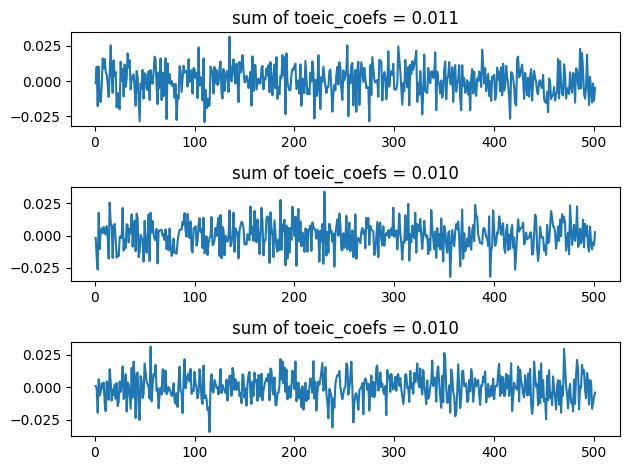

In [54]:
# 반복해보자
fig, ax = plt.subplots(3)
for i in range(3): 
    # step1 
    df_train,df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=i)
    X = df_train.loc[:,'gpa':'toeic499']
    XX = df_test.loc[:,'gpa':'toeic499']
    y = df_train.loc[:,'employment_score']
    yy = df_test.loc[:,'employment_score']
    # step2
    predictr = sklearn.linear_model.LinearRegression()
    # step3 
    predictr.fit(X,y)
    # step4 -- pass 
    #---# 
    s = pd.Series(predictr.coef_)
    ax[i].plot(s[1:])
    ax[i].set_title(f'sum of toeic_coefs = {sum(s[1:]):.3f}')
fig.tight_layout()
## step4: predictor.predict을 이용하여 예측 -- pass 

- seed1, seed2, seed3에 따라 결과가 달라진다.
- 모든 0-501 (toeic~toeic499)개의 계수를 더해보면 0.01로 수렴한다.
- 실제로는 toeic x의 점수를 높이면 합격확률이 높아져야 하지만, 위와 같이 다중공선성 상황에서는 음의 계수를 갖는 경우도 있다.)

# 결론
: 선형회귀 분석을 진행할 때, y과 상관관계에 있는 변수만 넣어야 회귀모델이 올바르게 적합된다.
(비슷한 역할을 하는 변수는 1개만 입력하자!)
변수선택을 잘하자!!!!

# week6-2 
## 다중공선성 해결방법 : Ridge, Lasso

다중공선성을 해결하는 방법?
- 변수선택을 잘하면 된다 ==> 현실적으로 불가능
- 현실상황에서 어떻게? ==> Ridge, Lasso

### Ridge의 아이디어
- 많은 변수가 주어졌을 때, 특정한 몇개의 변수로만 0.01 이라는 계수를 설명할 수 없도록 "패널티"를 주자.
- 패널티: 유사토익들의 계수값을 제곱한 뒤 합치고(L2-norm을 구하고), 그 값이 0에서 떨어져 있는만큼 패널티를 준다.
- 이러한 패널티를 줄 경우 결과적으로 0.01의 계수가 "동일하게 나누어져서" 나오는값(=1/100, 1/501)이 계수값으로 추정된다.
- 그렇다고 "동일하게 나누어져서"라는 말이 모든 계수가 "엔빵" 된다는 의미는 아니다. 0에서 떨어져 있을수록 값에 패널티를 주는 것(알파값으로 패널티를 조절)

In [92]:
# Ridge regression
## step1 --- toeic, gpa 만 남기고 나머지 변수를 삭제
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train.loc[:,'employment_score']
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test.loc[:,'employment_score']
## step2
predictr = sklearn.linear_model.Ridge(alpha=1.5) # sklearn.linear_model.Ridge()와 같은코드
## step3 
predictr.fit(X,y)
## step4 -- pass 

Ridge(alpha=1.5)

## 계수해석 및 평가

In [80]:
print(f'train_score: {predictr.score(X,y):.4f}')
print(f'test_score: {predictr.score(XX,yy):.4f}')

train_score: 1.0000
test_score: 0.1174


## 하이퍼파라미터 튜닝(알파)

In [81]:
## step1 --- toeic, gpa 만 남기고 나머지 변수를 삭제
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train.loc[:,'employment_score']
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test.loc[:,'employment_score']
## step2
predictr = sklearn.linear_model.Ridge(alpha=5e8) # sklearn.linear_model.Ridge()와 같은코드
## step3 
predictr.fit(X,y)
## step4 -- pass 

Ridge(alpha=500000000.0)

## 계수해석 및 평가

In [82]:
print(f'train_score: {predictr.score(X,y):.4f}')
print(f'test_score: {predictr.score(XX,yy):.4f}')

train_score: 0.7507
test_score: 0.7438


In [84]:
s = pd.Series(predictr.coef_)
s.index = X.columns
s

gpa         0.000001
toeic       0.000019
toeic0      0.000018
toeic1      0.000018
toeic2      0.000019
              ...   
toeic495    0.000018
toeic496    0.000019
toeic497    0.000019
toeic498    0.000019
toeic499    0.000019
Length: 502, dtype: float64

In [85]:
0.01/501

1.9960079840319362e-05

## 결과분석- ⍺에 따른 계수값 변화

In [86]:
## step1 --- toeic, gpa 만 남기고 나머지 변수를 삭제
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train.loc[:,'employment_score']
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test.loc[:,'employment_score']
## step2
alphas = [5e2, 5e3, 5e4, 5e5, 5e6, 5e7, 5e8]
predictrs = [sklearn.linear_model.Ridge(alpha=alpha) for alpha in alphas]
## step3 
for predictr in predictrs:
    predictr.fit(X,y)
## step4 -- pass 

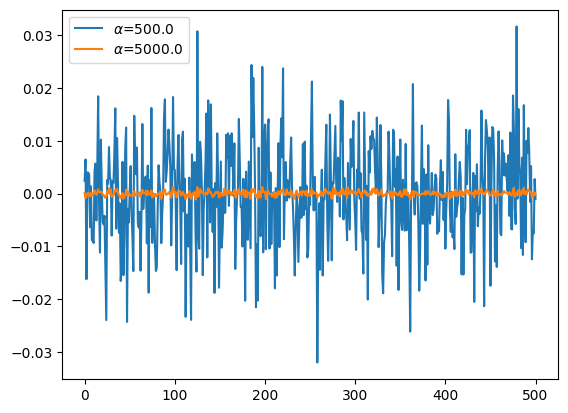

In [90]:
plt.plot(predictrs[0].coef_[1:],label=r'$\alpha$={}'.format(predictrs[0].alpha))
#plt.plot(predictrs[1].coef_[1:],label=r'$\alpha$={}'.format(predictrs[1].alpha))
#plt.plot(predictrs[2].coef_[1:],label=r'$\alpha$={}'.format(predictrs[1].alpha))
plt.plot(predictrs[3].coef_[1:],label=r'$\alpha$={}'.format(predictrs[1].alpha))
plt.legend()

- 불필요한 변수가 나올 수 없는 구조가 되었음(한 두개의 변수로 0.01 만들 수 없음)
- 모든 변수는 대략 2e-5 정도 만큼 똑같이 중요하다고 학습됨.
- 모든 계수가 1/(100*501)보다는 전체적으로 작아보이는데 이는 기분탓이 아니고 rigid method의 특징임.

## 결론
Ridge regression을 사용하면 실제 계수값(0.01)을 변수의 개수로 나눈값을 각 변수의 계수로 설정하는 효과를 얻을 수 있음.(계수값을 엔빵한다는 의미는 아님)

### Lasso의 아이디어
- 아주 적은 숫자의 계수들만 살려두고 나머지 계수값들은 0으로 강제한다.
- 이때 계수값을 0으로 만든다는 의미는 그 변수를 제거한 것과 같은 효과
- 아이디어의 기원: y = gpa, toeic가 실제 변수이지만, y = gpa, toeic0으로 적합해도 괜찮지 않을까?

In [93]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.Lasso(alpha=1)
## step3
predictr.fit(X,y)
## step4 : pass 

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.877e+01, tolerance: 3.337e-01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

## 계수해석 및 평가

In [94]:
print(f'train_score:\t {predictr.score(X,y):.4f}')
print(f'test_score:\t {predictr.score(XX,yy):.4f}')

train_score:	 0.8600
test_score:	 0.8306


### 결과분석 - Lasso regression으로 학습된 계수 확인

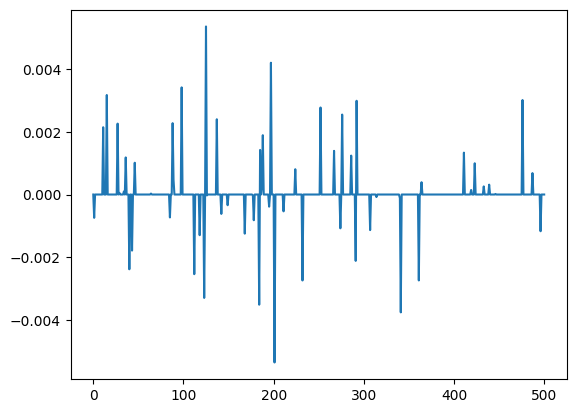

In [96]:
plt.plot(predictr.coef_[1:])

실제로 특정 변수를 제외하고 나머지 변수의 계수는 0으로 설정됨.

### 결과분석 - ⍺에 따른 변화 관찰

In [97]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
alphas = np.linspace(0,2,100)
predictrs = [sklearn.linear_model.Lasso(alpha=alpha) for alpha in alphas]
## step3
for predictr in predictrs: 
    predictr.fit(X,y)
## step4 : pass 

/tmp/ipykernel_32/2200579212.py:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  predictr.fit(X,y)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.510e+01, tolerance: 3.337e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/line

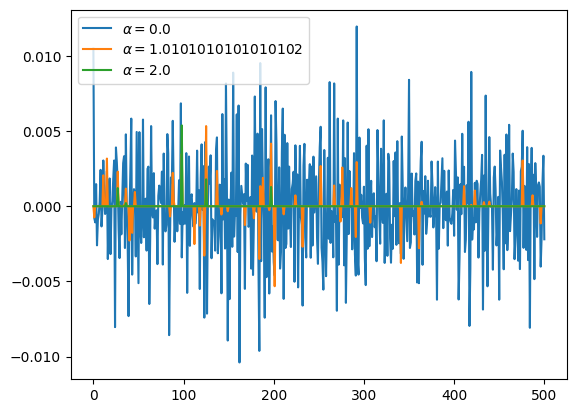

In [98]:
plt.plot(predictrs[0].coef_[1:],label=r'$\alpha={}$'.format(predictrs[0].alpha))
plt.plot(predictrs[50].coef_[1:],label=r'$\alpha={}$'.format(predictrs[50].alpha))
plt.plot(predictrs[-1].coef_[1:],label=r'$\alpha={}$'.format(predictrs[-1].alpha))
plt.legend()

⍺값이 커질수록 더 적은 변수만을 살려둔다.

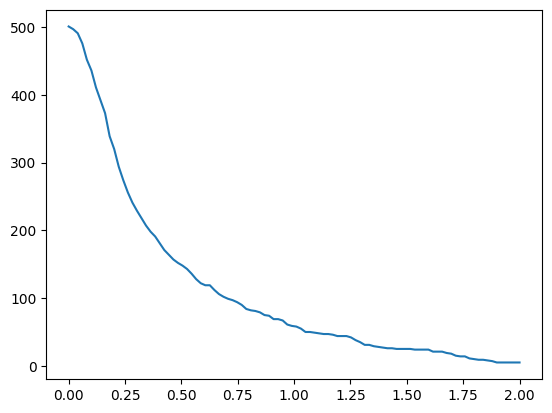

In [99]:
non_zero_coefs = [(abs(predictr.coef_[1:])>0).sum() for predictr in predictrs]
plt.plot(alphas,non_zero_coefs)

## 결론
ridge regression: coef의 값들을 변수 갯수로 엔빵하는 수학적 장치
- 패널티: 유사한 변수들의 계수값을 제곱한 뒤 합치고(=L2-norm), 그 값이 0에서 멀리 떨어져 있을수록 패널티 부여

Lasso regression: coef의 값들을 대부분 0으로 강제하는 수학적 장치
- 패널티: 유사한 변수들의 계수값의 절대값을 구한 뒤 합치고(L1-norm), 그 값이 0에서 떨어져 있을수록 패널티 부여